1)

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

C:\Users\vagelis\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
y = y.astype(np.int64)

In [4]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
X_train, y_train = X_train_full[:10000], y_train_full[:10000]
X_test, y_test = X_test_full[:2000], y_test_full[:2000]

In [6]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (10000, 784) (10000,)
Test set shape: (2000, 784) (2000,)


2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

In [8]:
parameters = {'max_features': [100, 150, 200],
              'max_depth': [2, 4, 5]}
regressor = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
gs= GridSearchCV(regressor, parameters,scoring='accuracy')

In [10]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [2, 4, 5],
                         'max_features': [100, 150, 200]},
             scoring='accuracy')

In [11]:
best_estimator = gs.best_estimator_;best_estimator

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=150,
                       random_state=42)

In [12]:
best_params = gs.best_params_;best_params

{'max_depth': 5, 'max_features': 150}

In [13]:
y_pred = best_estimator.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)

In [15]:
f1 = f1_score(y_test, y_pred, average='macro')

In [16]:
print("Accuracy:", accuracy)
print("F1 Score (macro):", f1)

Accuracy: 0.676
F1 Score (macro): 0.6638649138994265


In [17]:
results = gs.cv_results_;results

{'mean_fit_time': array([0.19286242, 0.28567076, 0.26963358, 0.30913305, 0.45308261,
        0.60625587, 0.39033298, 0.60553279, 0.74574175]),
 'std_fit_time': array([0.02795655, 0.01692104, 0.02237721, 0.00485967, 0.0312536 ,
        0.05207973, 0.01058702, 0.0448896 , 0.0394985 ]),
 'mean_score_time': array([0.00869222, 0.00920506, 0.00801034, 0.00897307, 0.00738897,
        0.00834727, 0.01050692, 0.00739388, 0.00953722]),
 'std_score_time': array([0.0038181 , 0.00097172, 0.00293074, 0.00176063, 0.00295565,
        0.00236055, 0.00334178, 0.00044889, 0.00252064]),
 'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[100, 150, 200, 100, 150, 200, 100, 150, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fil

In [18]:
for score, parameters in zip(results['mean_test_score'], results['params']):
    print(f"Mean test score is: {score:.3f} with parameters: {parameters}")

Mean test score is: 0.316 with parameters: {'max_depth': 2, 'max_features': 100}
Mean test score is: 0.316 with parameters: {'max_depth': 2, 'max_features': 150}
Mean test score is: 0.323 with parameters: {'max_depth': 2, 'max_features': 200}
Mean test score is: 0.563 with parameters: {'max_depth': 4, 'max_features': 100}
Mean test score is: 0.577 with parameters: {'max_depth': 4, 'max_features': 150}
Mean test score is: 0.584 with parameters: {'max_depth': 4, 'max_features': 200}
Mean test score is: 0.651 with parameters: {'max_depth': 5, 'max_features': 100}
Mean test score is: 0.660 with parameters: {'max_depth': 5, 'max_features': 150}
Mean test score is: 0.655 with parameters: {'max_depth': 5, 'max_features': 200}


3)

In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [20]:
pca = PCA(n_components=0.90, random_state=42)

In [21]:
pipeline = Pipeline([('pca', pca),
('decision_tree', DecisionTreeClassifier(criterion='entropy', max_depth=best_params['max_depth'], random_state=42))])


In [22]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=42)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        random_state=42))])

In [23]:
y_pred_pca = pipeline.predict(X_test)


In [24]:
accuracy_pca = accuracy_score(y_test, y_pred_pca)

In [25]:
f1_pca = f1_score(y_test, y_pred_pca, average='macro')


In [26]:
print(f"Decision Tree with PCA Accuracy:, {accuracy_pca:.3f}")
print(f"Decision Tree with PCA F1 Score:, {f1_pca:.3f}")
print("Accuracy:", accuracy)
print(f"F1 Score (macro):, {f1:.3f}")

Decision Tree with PCA Accuracy:, 0.670
Decision Tree with PCA F1 Score:, 0.646
Accuracy: 0.676
F1 Score (macro):, 0.664


As we can see we have slightly worse results with the PCA, which is reasonable because with the dimensionality reduction of PCA
we have some information loss. This is happening because we keep the Principal components that represent the most variance and neglect the low variance PCs, resulting on having some variance loss which is translated in information loss. On the other hand PCA transformation makes the system to perform faster by performing faster computations and reducing storage requirements. So the trade off is losing some information but gaining on speed and performance.

4)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gbc = GradientBoostingClassifier(
    max_depth=2,
    n_estimators=6,
    learning_rate=1.0,
    random_state=42
)

In [29]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
gbc.fit(X_train_pca, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=6,
                           random_state=42)

In [31]:
y_pred_gbc = gbc.predict(X_test_pca)


In [32]:
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='macro')

In [33]:
print(f"PCA/GBC Accuracy: {accuracy_gbc:.3f}")
print(f"PCA/GBC F1 Score: {f1_gbc:.3f}")
print(f"Decision Tree with PCA Accuracy:, {accuracy_pca:.3f}")
print(f"Decision Tree with PCA F1 Score:, {f1_pca:.3f}")

PCA/GBC Accuracy: 0.772
PCA/GBC F1 Score: 0.768
Decision Tree with PCA Accuracy:, 0.670
Decision Tree with PCA F1 Score:, 0.646


Gradient Boosting is an ensemble learning method that combines swallow Trees into a stronger Tree.It trains models sequentially 
to minimize the error of the previous model using Gradient Descent that's why we end up having better accuracy results than the Deeper Tree classifier. 

5)

In [34]:
import matplotlib.pyplot as plt

In [35]:
reconstructed_images = pca.inverse_transform(X_train_pca[:5])
original_images = X_train[:5]

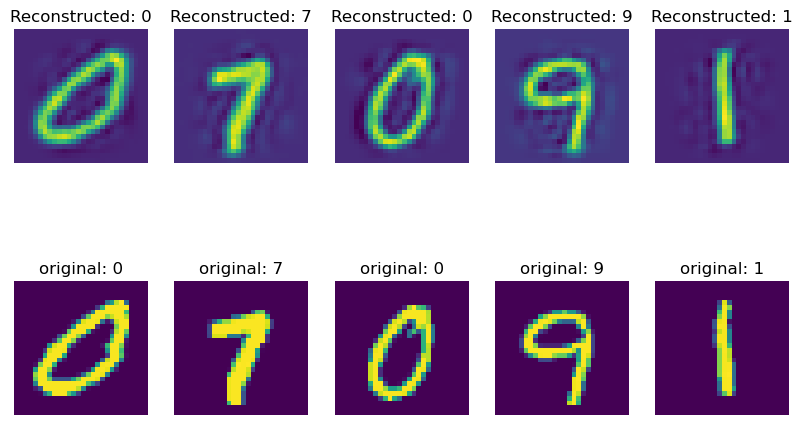

In [36]:
plt.figure(figsize=(10,6))
for i in range(0,5):
    plt.subplot(2,5,i+1)
    plt.imshow(reconstructed_images[i].reshape(-28,28))
    plt.title(f"Reconstructed: {y_train[i]}")
    plt.axis("off")
    
    plt.subplot(2,5,i+6)
    plt.imshow(original_images[i].reshape(-28,28))
    plt.title(f"original: {y_train[i]}")
    plt.axis("off")
plt.show()  

In [37]:
from sklearn.cluster import KMeans

In [38]:
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_train_pca)

C:\Users\vagelis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=20, random_state=42)

In [39]:
representative_digits = []
for i in range(20):
    cluster_center = kmeans.cluster_centers_[i]
    distances = np.linalg.norm(X_train_pca - cluster_center, axis=1) #calculates euclidian distance
    representative_digits.append(X_train[np.argmin(distances)]) 

#add to representative_digits list the index with the smallest distance
#the data point closest to the cluster i centroid


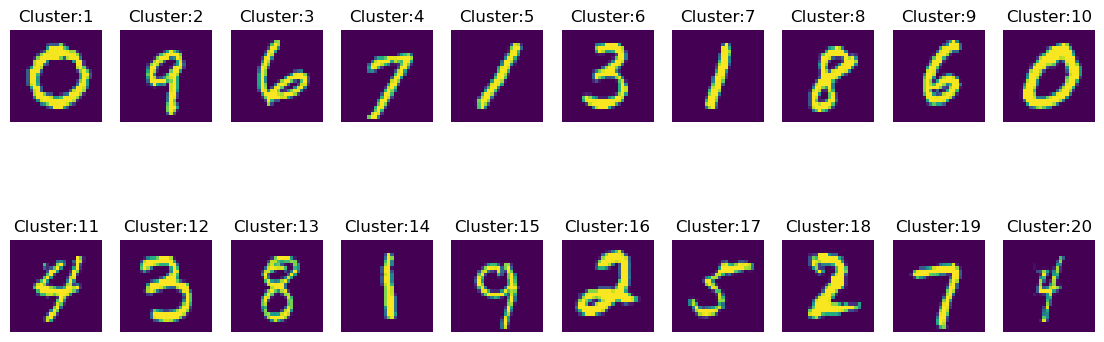

In [40]:
plt.figure(figsize=(14, 5))
for i in range(0,20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(representative_digits[i].reshape(28, 28))
    plt.title(f"Cluster:{i+1}")
    plt.axis('off')
plt.show()

6)

In [60]:
labels=[]
for i in range(10):
    labels.extend(2*[i])
labels

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [61]:
labels=np.array(labels);labels

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9])

In [62]:
cluster_prediction = kmeans.predict(X_test_pca) #assign X_test_pca to clusters 0-20
np.unique(cluster_prediction)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [63]:
for cluster in cluster_prediction:
    print(labels[cluster],end=" " )

9 6 6 3 8 2 1 5 3 6 4 4 9 4 3 3 5 9 9 4 2 6 8 4 0 3 9 6 1 4 5 5 7 9 9 1 3 2 0 0 0 6 7 6 4 9 4 0 5 7 1 9 8 2 9 7 7 4 5 4 1 2 9 6 0 3 2 9 2 8 8 1 3 2 8 4 6 3 9 3 4 8 5 6 5 1 9 6 1 9 3 0 5 9 6 8 5 4 9 0 6 1 8 8 4 1 6 1 2 6 7 9 4 7 5 4 7 5 8 9 3 8 5 6 3 1 7 6 6 6 0 2 1 5 4 1 4 4 8 5 1 6 8 0 7 8 0 4 4 5 2 9 6 0 0 7 4 8 0 2 4 8 5 7 0 8 2 7 0 6 9 3 1 4 6 9 8 2 2 0 4 5 4 7 5 3 9 5 9 8 4 3 9 4 0 6 2 8 6 9 0 3 9 3 5 0 6 6 7 3 0 0 1 6 0 2 8 4 0 4 3 4 0 6 4 3 3 2 0 0 1 5 3 0 4 8 4 6 1 6 5 3 1 0 6 7 5 4 6 0 2 0 5 9 3 3 1 3 0 6 7 1 8 5 2 2 1 2 9 7 8 8 3 9 9 4 7 0 9 0 7 6 5 2 6 6 2 3 5 9 7 3 4 8 3 9 4 7 3 0 8 5 1 0 6 0 6 7 5 6 0 7 6 4 0 0 7 3 8 3 5 1 6 9 7 4 5 2 7 3 9 5 9 4 2 5 1 6 3 3 2 2 6 1 5 0 5 0 2 0 1 9 6 9 0 3 9 8 6 7 0 6 9 2 5 0 4 6 6 1 8 1 1 9 2 3 7 4 4 4 9 6 6 8 6 0 3 1 1 0 3 6 1 4 2 1 4 0 8 9 4 9 5 9 3 4 2 9 8 2 4 1 6 8 6 8 1 7 3 3 4 9 0 7 4 3 3 6 2 1 3 3 7 8 7 9 1 9 0 7 9 7 7 0 0 7 0 4 7 8 9 7 2 4 0 0 3 4 3 5 5 5 8 6 1 4 4 0 9 0 8 6 7 0 2 4 9 8 3 1 9 5 0 4 4 2 4 4 9 4 0 7 4 8 4 8 6 4 6 2 

In [64]:
cluster_prediction

array([18, 12, 13, ...,  5,  0,  9])

In [65]:
y_pred_clusters = np.array([labels[cluster] for cluster in cluster_prediction])

In [66]:
np.unique(y_pred_clusters)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
accuracy_clusters = accuracy_score(y_test, y_pred_clusters)
f1_clusters = f1_score(y_test, y_pred_clusters, average='macro')

In [68]:
print(f"KMeans Accuracy: {accuracy_clusters:.3f}")
print(f"KMeans F1 Score: {f1_clusters:.3f}")

KMeans Accuracy: 0.080
KMeans F1 Score: 0.078


Using KMeans with label propagation can not reach the performance of supervised classifiers but it can still achieve reasonable accuracy if the clusters are well-separated and the manual labeling is accurate.Compared to Decision Trees and GradientBoosting, KMeans with label propagation is faster in training but might underperform due to the lack of a supervised optimization process. This highlights the trade-offs between unsupervised and supervised learning approaches.
